# Weed Population

The problem of weed herbicide resistance is one of the most pressing problems of modern agriculture. Weeds can spread across fields and cause substantial competition for limiting resources with crops. In this exercise we will implement a simple two-dimensional model to simulate the population dynamics of weeds in which a few of them develop herbicide resistance in each generation.

Weed population dynamics are determined by plant species, mode of seed dispersal, tillage, presence of seed predators, and frequency and control methods by the farmer. So, we need to adopt some simplifying assumptions to get us started with a simple model. The model will have the following assumptions:

- Weeds will be annual plants. This means that after producing offspring, dead weeds are removed from the simulation. The success of the population rests entirely on the ability of the seeds of the resistant weeds to grow and generate their own offspring.

- A small fraction of the initial population of weeds will be considered herbicide resistant.

- Self-pollinating weeds.

- Annual herbicide application. This means that every year non-resistant plants will be killed by herbicide applications.

These assumptions will make the problem simple to code and visualize how the population starts to spread across the field. You can add more complexity to the model by accounting for dioic plants (separate male and female plants) that rely on plant distance and presence of insects to cross-pollinate and produce seed. 

In [115]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [116]:
# Random seed for reproducibility
np.random.seed(2)

# Inputs
N_init = 200 # Initial number of weeds (including both resistant and non-resistant)
x_max = 1000 # meters
y_max = 1000 # meters
weeds_x = np.random.random(Ninit)*x_max # Random X coordinates of initial weeds
weeds_y = np.random.random(Ninit)*y_max # Random Y coordinates of initial weeds
period = 10 # simulation years
delta = 0.015 # fraction of growing weeds resistant to herbicide per year
seeds = 3 # viable seeds per resistant plant at maturity that will germinate next year
sigma = 50 # meters


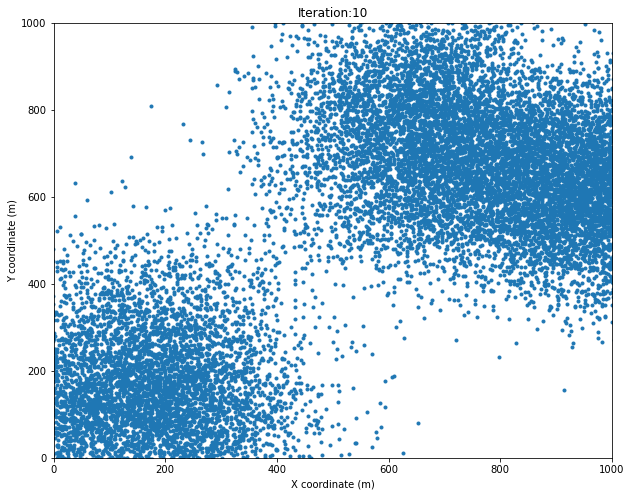

In [117]:
# Model
for t in range(period):
    
    if t==1:
        # Select resistant weeds from pool of all weeds
        N_resistant = np.int(np.round(N_init*delta))
        idx_resist = np.random.choice(np.arange(N_init), N_resistant, replace=False)
        weeds_x = weeds_x[idx_resist]
        weeds_y = weeds_y[idx_resist]
    
    elif t>1:

        # Stop if weeds were erradicated
        if N == 0:
            break
    
        # Compute coordinates of new weeds generate from current weeds
        new_weeds_x = np.array([])
        new_weeds_y = np.array([])
        for k in range(weeds_x.shape[0]):
            new_weeds_x = np.concatenate([new_weeds_x, weeds_x[k] + sigma*np.random.randn(seeds)])
            new_weeds_y = np.concatenate([new_weeds_y, weeds_y[k] + sigma*np.random.randn(seeds)])
           
        # Replace coordinates of weeds that complete their life cycle with new ones
        weeds_x = new_weeds_x
        weeds_y = new_weeds_y
    
    clear_output(wait=True)
    plt.figure(figsize=(10,8))
    plt.xlim([0,x_max])
    plt.ylim([0,y_max])
    plt.title('Iteration:' + str(t+1))
    plt.plot(weeds_x, weeds_y, '.')
    plt.xlabel('X coordinate (m)')
    plt.ylabel('Y coordinate (m)')
    plt.show()

## References

Holst, N., Rasmussen, I.A. and Bastiaans, L., 2007. Field weed population dynamics: a review of model approaches and applications. Weed Research, 47(1), pp.1-14.

Trucco, F., Jeschke, M.R., Rayburn, A.L. and Tranel, P.J., 2005. Amaranthus hybridus can be pollinated frequently by A. tuberculatus under field conditions. Heredity, 94(1), pp.64-70.